# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 (20 баллов)
* Задача 2 (40 баллов)
* Задача 3 (40 баллов)

<b><font color="orange">Сложная часть</font></b>:
* Задача 4 (30 баллов)
* Задача 5 (40 баллов)


-----

In [1]:
# Bot check

# HW_ID: phds_hw1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [128]:
from itertools import accumulate

import scipy.stats as sps
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [3]:
sns.set_palette("Set2")

## <b><i><font color="blue">Легкая часть</font></i></b>

### Задача 1

Изобразите график параметрически заданной функции. Переменные необходимо задавать с помощью Numpy.

$$ x=\alpha\times\left(\cos t+\frac{cos(\beta t)}{\beta}\right)$$

$$y=\alpha\times\left(\sin t−\frac{sin(\beta t)}{\beta}\right)$$

$$t∈[0;20π]$$ 

1. Реализуйте функции $x(t, \alpha, \beta)$ и $y(t, \alpha, \beta)$

In [4]:
def x(t, alpha, beta):
    return alpha * (np.cos(t) + np.cos(beta * t) / beta)


def y(t, alpha, beta):
    return alpha * (np.sin(t) - np.sin(beta * t) / beta)

2. Постройте график в осях $x$ и $y$ при $\alpha=4$ и $\beta=1.1$. Подпишите оси.

In [5]:
alpha = 4
beta = 1.1

grid = np.linspace(0, 20 * np.pi, num=1000)

xs = [x(t, alpha=alpha, beta=beta) for t in grid]
ys = [y(t, alpha=alpha, beta=beta) for t in grid]

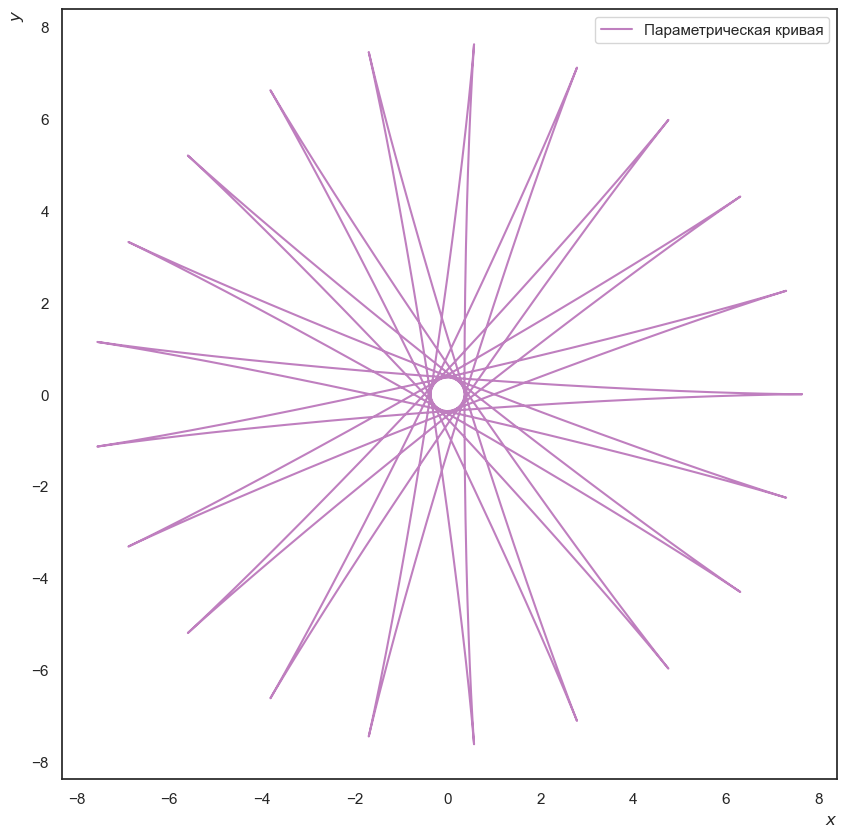

In [6]:
plt.figure(figsize=(10, 10))

plt.plot(xs, ys, alpha=0.5, color="purple", label="Параметрическая кривая")
plt.xlabel(r'$x$', loc='right')
plt.ylabel(r'$y$', loc='top')
plt.legend()
plt.show()

3. Постройте графики для различных значений $\alpha$ и $\beta$.  
- $\alpha$ : [2, 4, 6, 8, 10]  
- $\beta$ : [1.2, 1.8, 2, 5, 10]  

У вас должна получиться сетка 5х5 графиков. На каждом графике укажите параметры $\alpha$ и $\beta$.

In [7]:
ts = np.linspace(0, 20 * np.pi, num=1000)

alphas = [2, 4, 6, 8, 10]
betas = [1.2, 1.8, 2, 5, 10]

<Figure size 1000x1000 with 0 Axes>

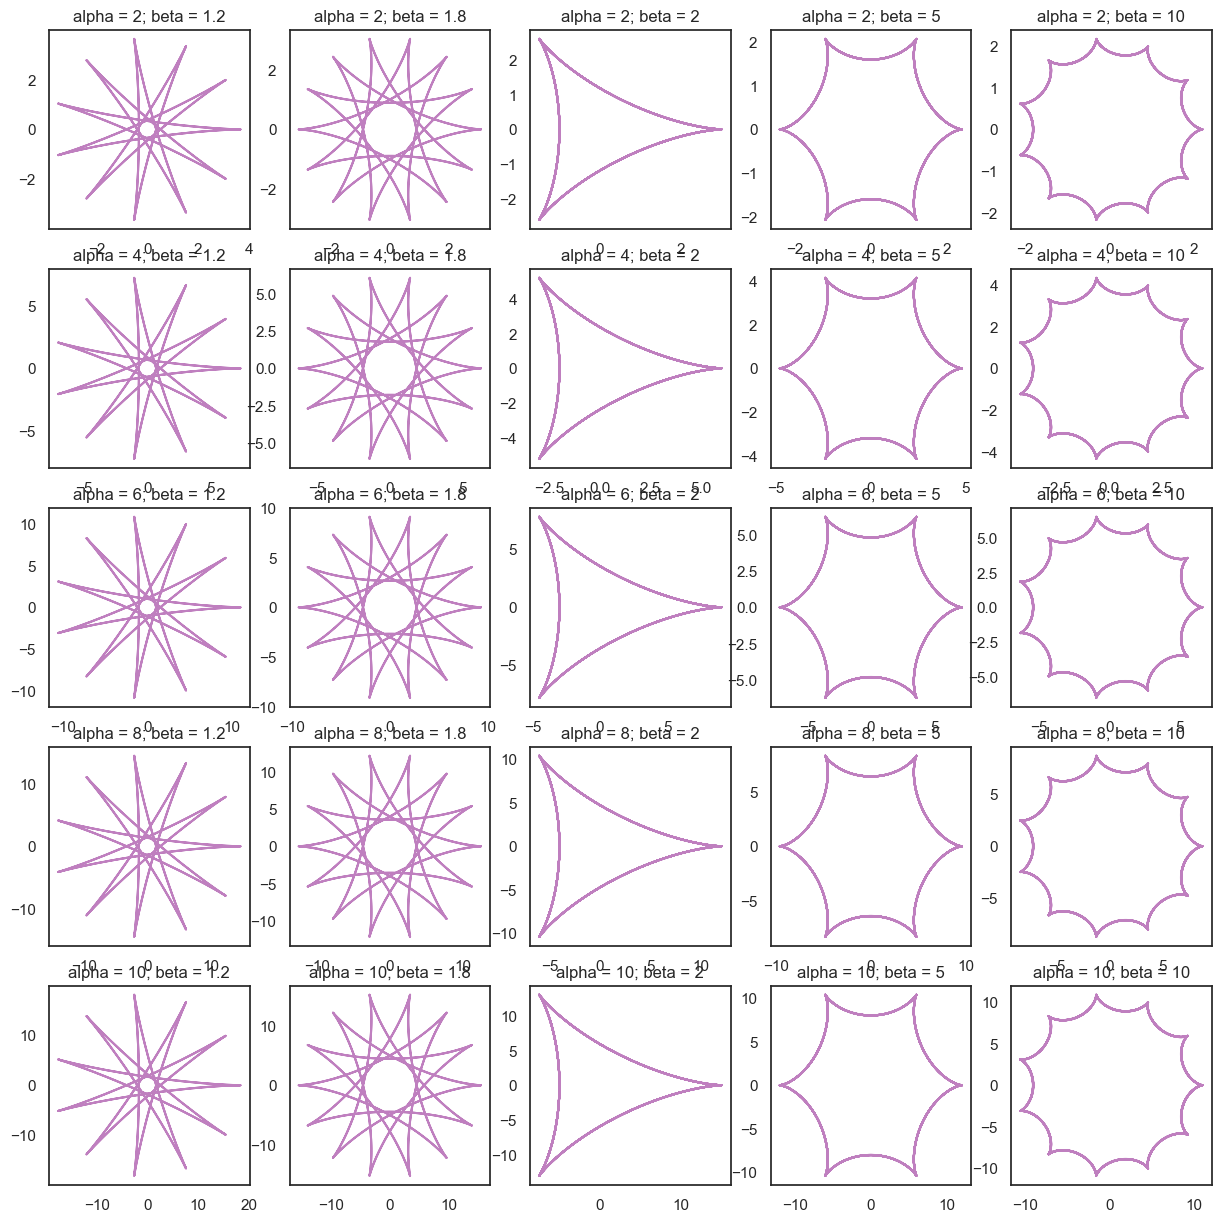

In [8]:
plt.figure(figsize=(10, 10))

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i in range(len(alphas)):
    for j in range(len(betas)):
        xs = [x(t, alpha=alphas[i], beta=betas[j]) for t in ts]
        ys = [y(t, alpha=alphas[i], beta=betas[j]) for t in ts]
        axs[i][j].plot(
            xs, ys, alpha=0.5, color="purple", label="Параметрическая кривая"
        )
        axs[i][j].set_title(f"alpha = {alphas[i]}; beta = {betas[j]}")

plt.show()

### Задача 2

Для выполнения задания выберите любой профиль, в течении 1-2 недель его можно поменять.

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [20]:
df = pd.read_csv("./dielectron.csv")

Посмотрим на первые строки этой таблицы.

In [21]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


Выберите несколько (3-6) столбцов для анализа значений в них.

In [66]:
columns = ['E1', 'px1', 'pt1', 'eta1', 'phi1', 'M']

df_chosen_columns = df[columns]

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


C:\Users\korot\AppData\Local\Temp\ipykernel_18912\1895251688.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


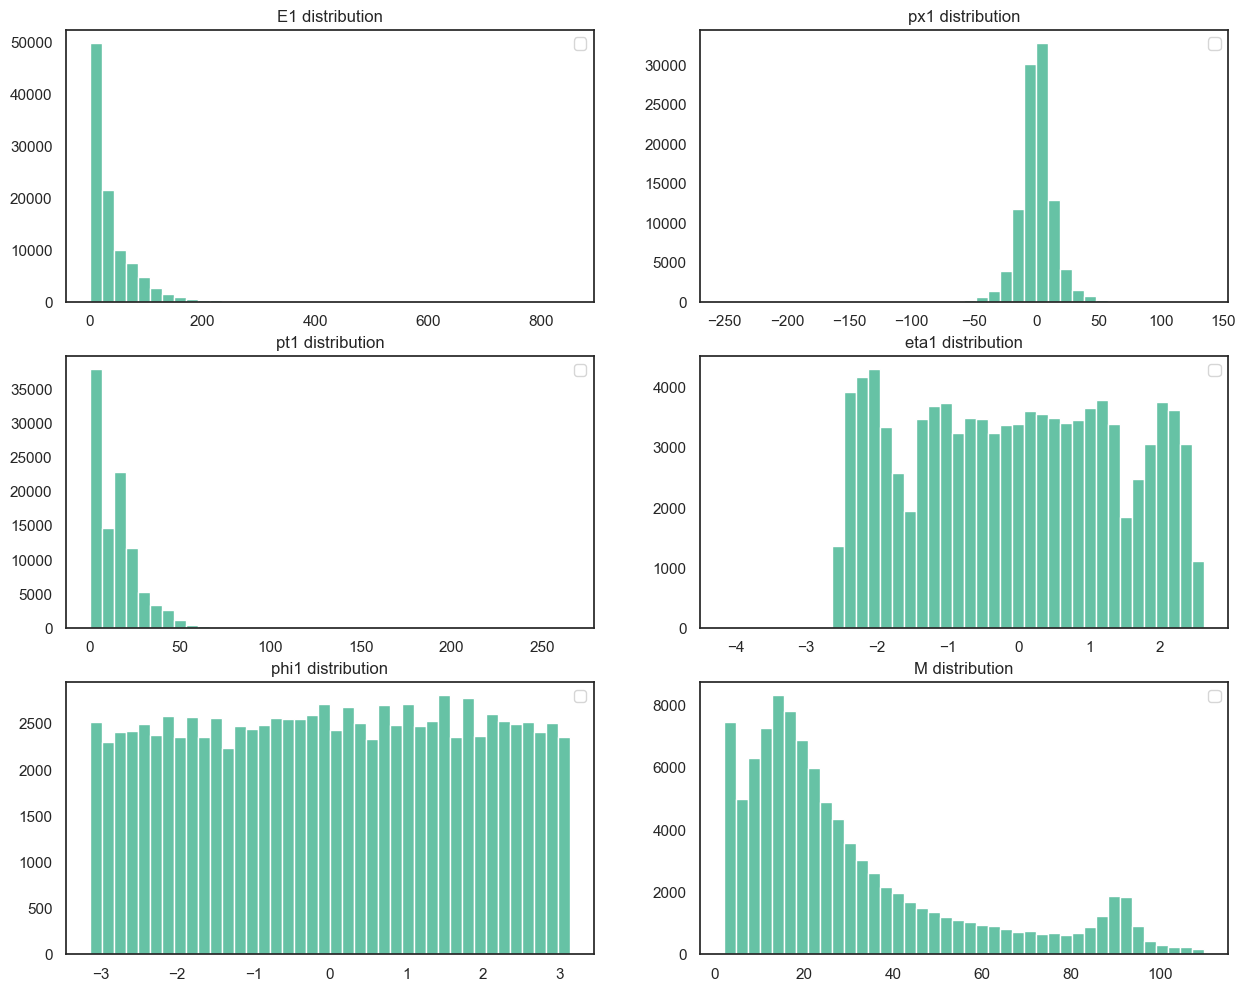

In [67]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, column in enumerate(columns): 
    ax = axs[i // len(axs[0]), i % len(axs[0])]
    ax.hist(df_chosen_columns[column], bins=40)
    ax.set_title(f'{column} distribution')
    ax.legend()

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ:** Вероятно, выбросы есть в тех признаках, в которых гистограммы имеют неоправданно много <<пустого>> пространства по краям. поскольку, видимо, в этом пространстве есть столбцы очень маленькой высоты, то есть крайне редко встречающиеся крайне большие/малые значения. Это столбцы
```python
['E1', 'px1', 'pt1', 'eta1']
```

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

(array([  3.,   5.,  15.,  27.,  55.,  77., 109., 123., 144., 144., 115.,
         73.,  51.,  32.,  17.,   4.,   2.,   3.,   1.,   0.]),
 array([-3.  , -2.65, -2.3 , -1.95, -1.6 , -1.25, -0.9 , -0.55, -0.2 ,
         0.15,  0.5 ,  0.85,  1.2 ,  1.55,  1.9 ,  2.25,  2.6 ,  2.95,
         3.3 ,  3.65,  4.  ]),
 <BarContainer object of 20 artists>)

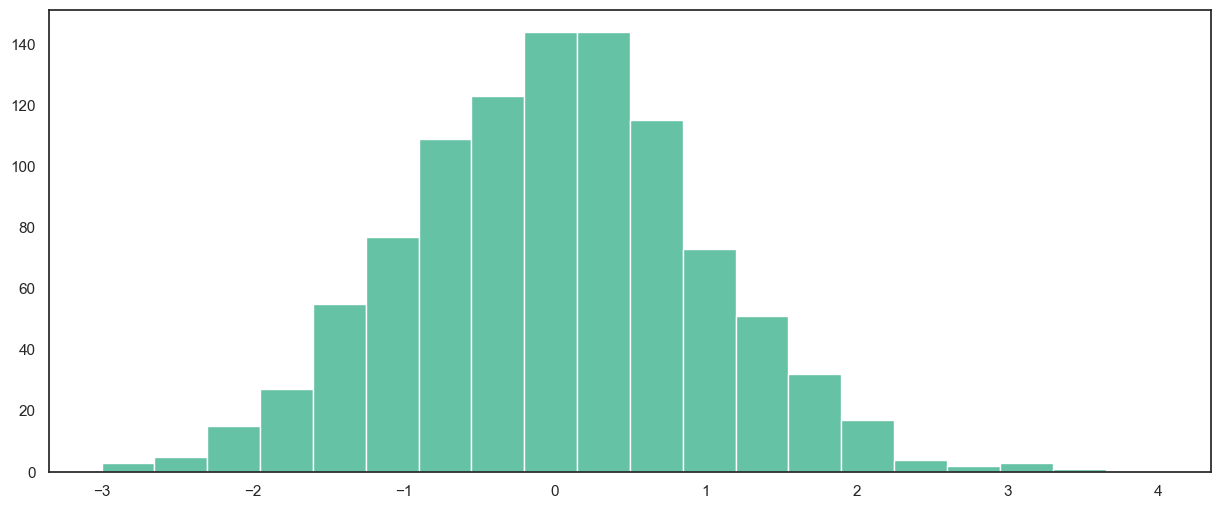

In [69]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4))

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

(array([425., 567.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-2.81208107, -0.17147702,  2.46912704,  5.10973109,  7.75033514,
        10.3909392 , 13.03154325, 15.6721473 , 18.31275136, 20.95335541,
        23.59395947, 26.23456352, 28.87516757, 31.51577163, 34.15637568,
        36.79697973, 39.43758379, 42.07818784, 44.71879189, 47.35939595,
        50.        ]),
 <BarContainer object of 20 artists>)

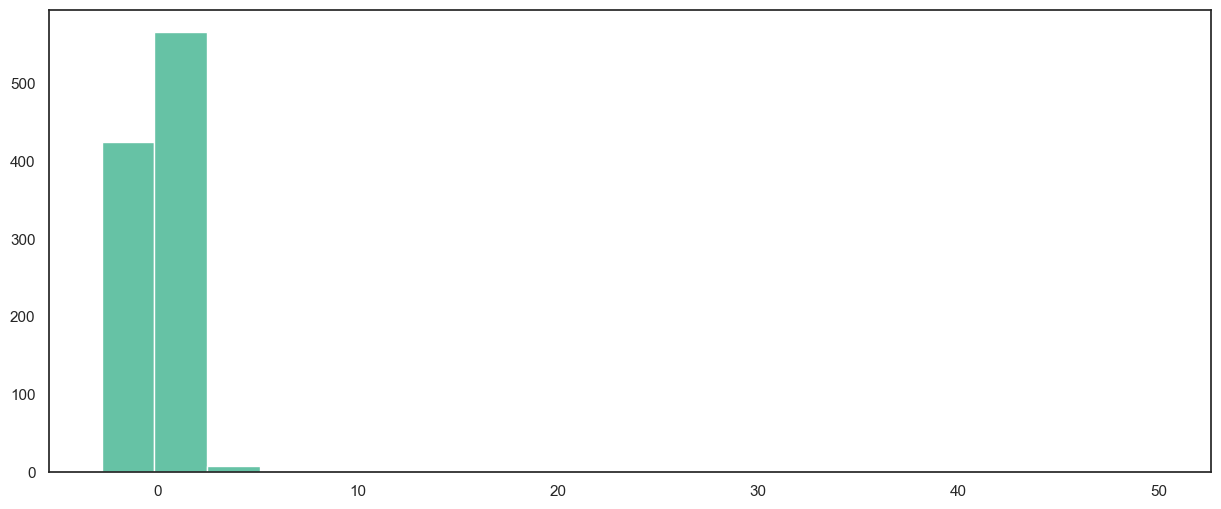

In [70]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20)

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

(array([  3.,   5.,  15.,  27.,  54.,  77., 109., 123., 144., 144., 115.,
         73.,  51.,  32.,  17.,   4.,   2.,   3.,   1.,   0.]),
 array([-3.  , -2.65, -2.3 , -1.95, -1.6 , -1.25, -0.9 , -0.55, -0.2 ,
         0.15,  0.5 ,  0.85,  1.2 ,  1.55,  1.9 ,  2.25,  2.6 ,  2.95,
         3.3 ,  3.65,  4.  ]),
 <BarContainer object of 20 artists>)

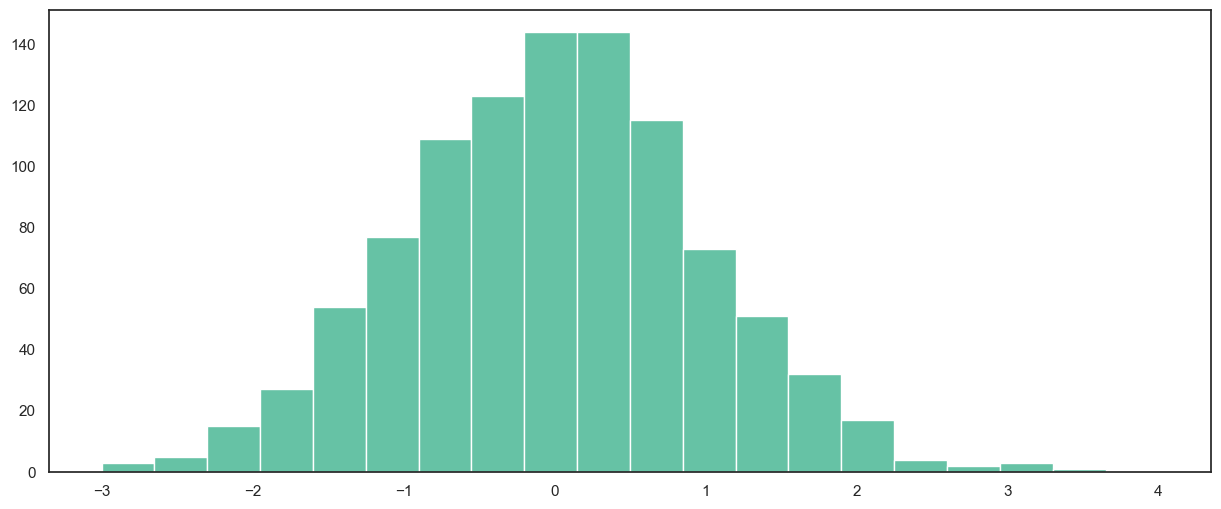

In [71]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4))

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

C:\Users\korot\AppData\Local\Temp\ipykernel_18912\3488279875.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


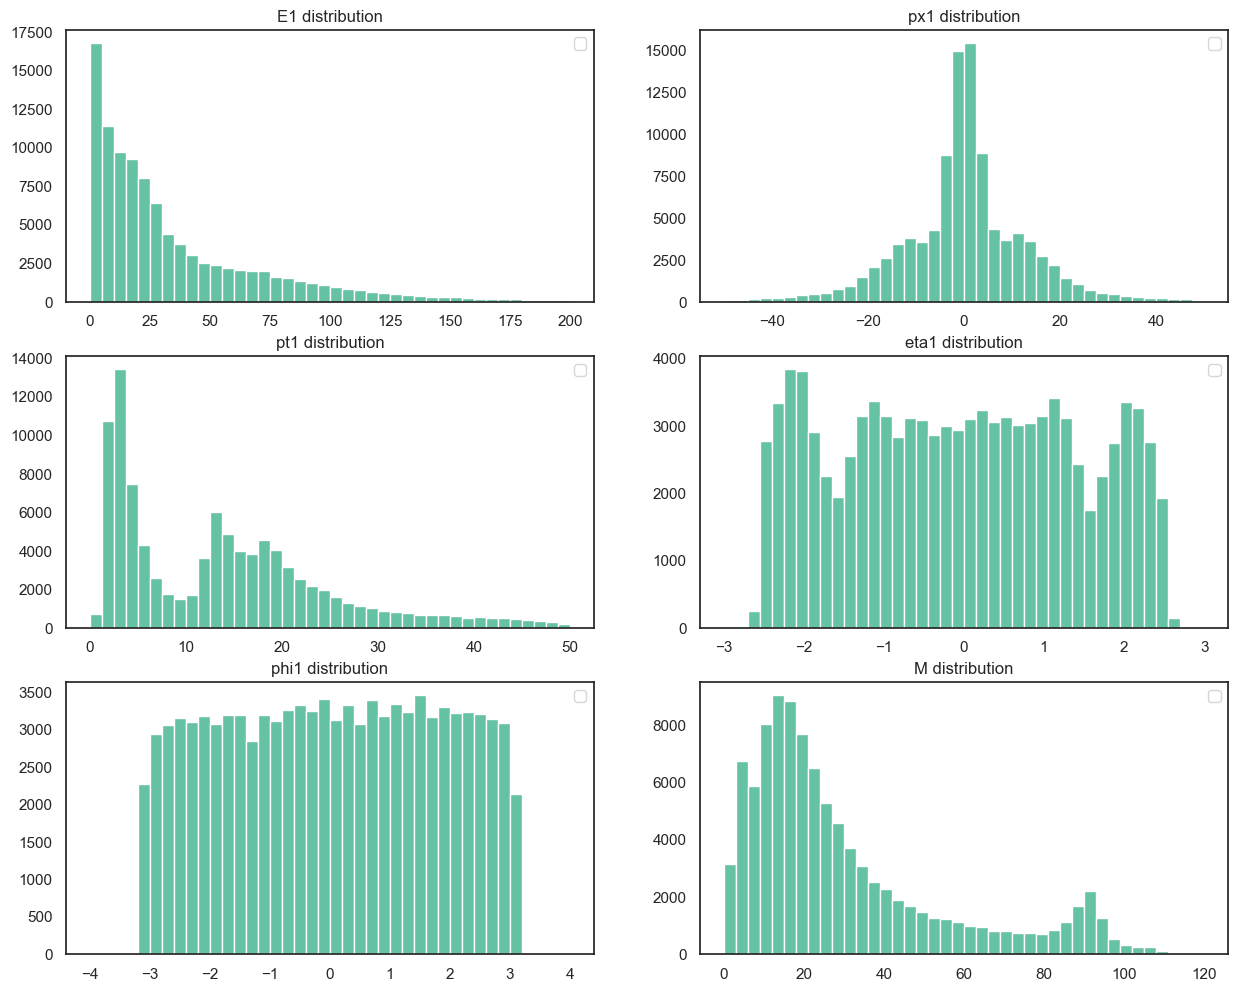

In [75]:
ranges_without_outliers = {
    'E1' : (0, 200),
    'px1' : (-50, 50),
    'pt1' : (0, 50),
    'eta1' : (-3, 3),
    'phi1' : (-4, 4),
    'M' : (0, 120),
}


fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, column in enumerate(columns): 
    ax = axs[i // len(axs[0]), i % len(axs[0])]
    ax.hist(df_chosen_columns[column], range=ranges_without_outliers[column], bins=40)
    ax.set_title(f'{column} distribution')
    ax.legend()

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ:** Да, особенно это заметно на графиках распределений ```px1``` и ```pt1```

#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях можно использовать ядерные оценки плотности. 

В библиотеке `seaborn` они представлены функциями `distplot` (в версиях до `0.11.1`), `kdeplot` (начиная с версии `0.11.1`)

In [76]:
sns.__version__

'0.13.2'

Пример для нормального распределения с выбросом.

<Axes: ylabel='Count'>

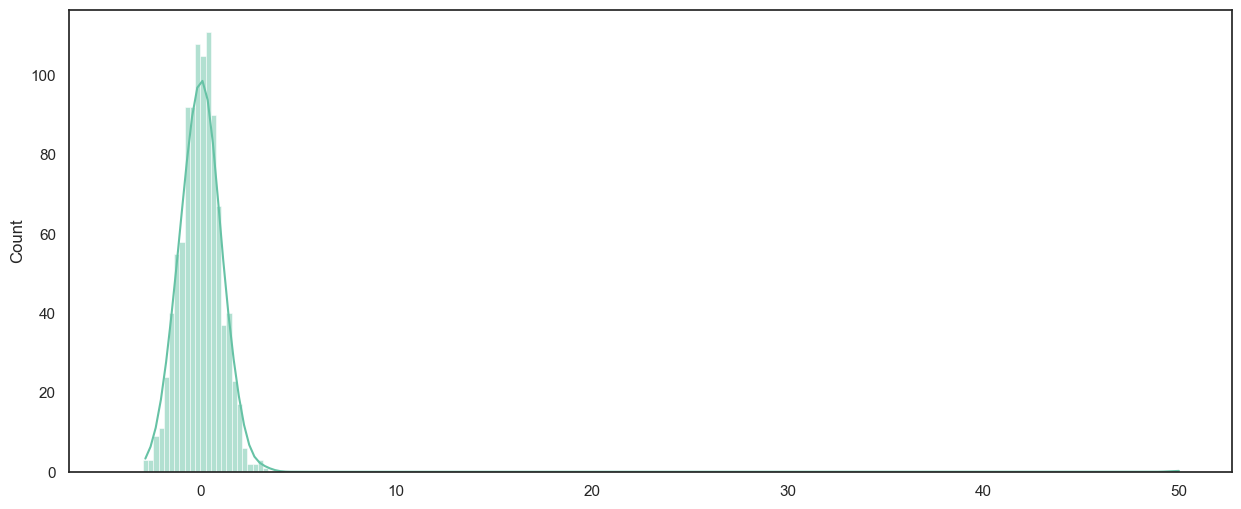

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(sample, , bins=30, kde=True)

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения. В библиотеке `scipy` плотность распределения называется `pdf`.

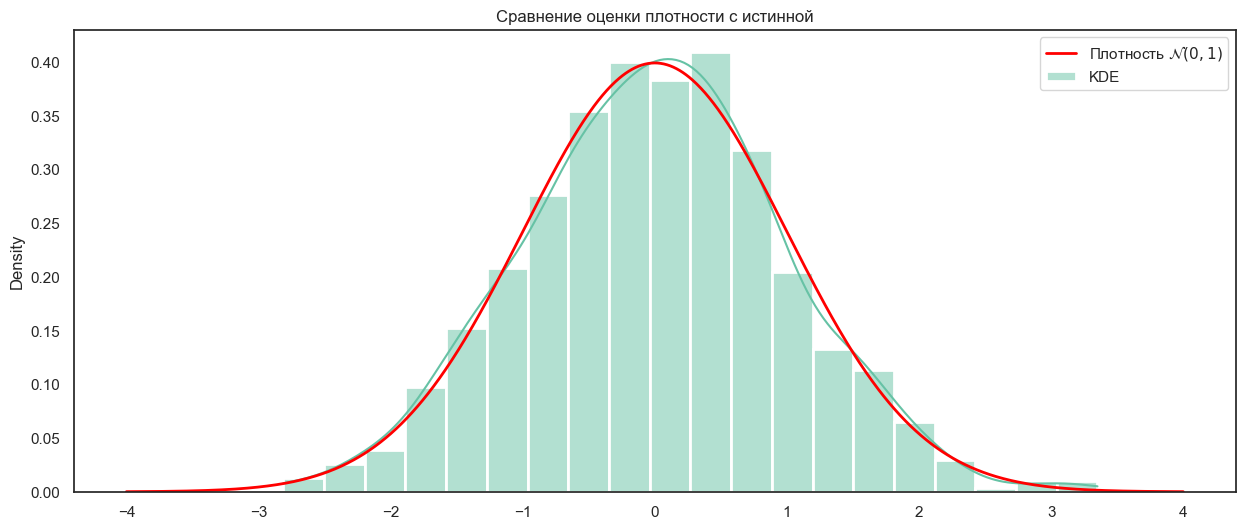

In [101]:
sample_wo_ourliers = sample[1:]

grid = np.linspace(-4, 4, 1000)

norm_pdf_values = sps.norm.pdf(grid)

plt.figure(figsize=(15, 6))
sns.histplot(sample_wo_ourliers, stat='density', bins=20, kde=True, label="KDE", linewidth=2)
plt.plot(grid, norm_pdf_values, color='red', label="Плотность $\\mathcal{N}(0,1)$", lw=2)
plt.title("Сравнение оценки плотности с истинной")
plt.legend()

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируйте выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$. Для этого воспользуйтесь функцией `sps.expon.rvs`.

In [107]:
exp_sample = sps.expon.rvs(size=100, random_state=42)

Посчитайте значения плотности этого распределения на промежутке от 0 до 6.

In [109]:
grid = np.linspace(0, 6, 1000)
exp_density_sample = sps.expon.pdf(grid)

Нарисуйте гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

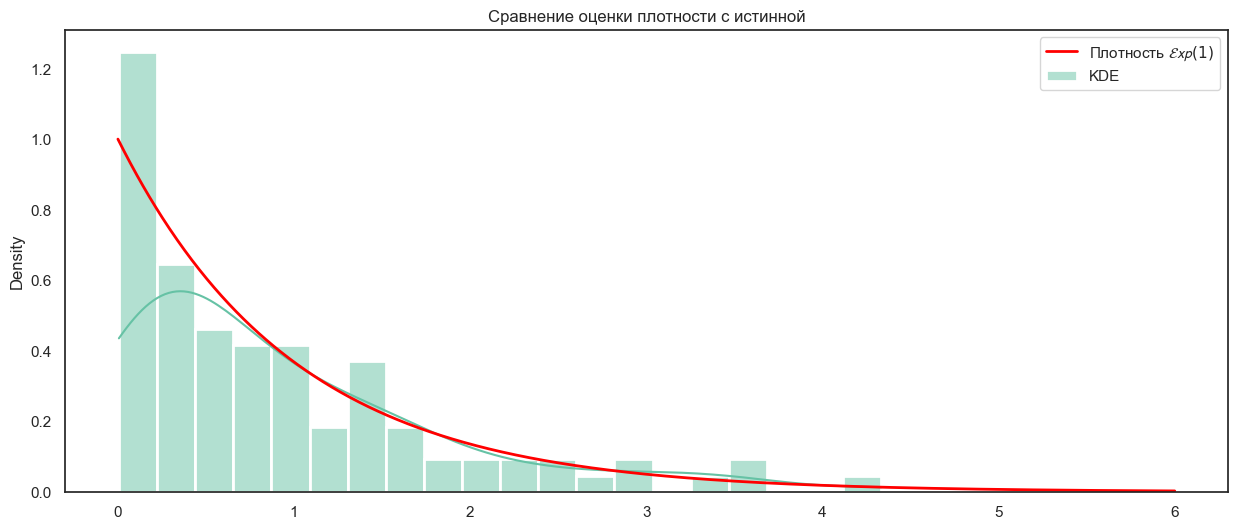

In [110]:
plt.figure(figsize=(15, 6))
sns.histplot(exp_sample, stat='density', bins=20, kde=True, label="KDE", linewidth=2)
plt.plot(grid, exp_density_sample, color='red', label="Плотность $\\mathcal{Exp}(1)$", lw=2)
plt.title("Сравнение оценки плотности с истинной")
plt.legend()

Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**Ответ:** 

Нарисуйте гистограммы и ядерные оценки плотности для исследуемых признаков

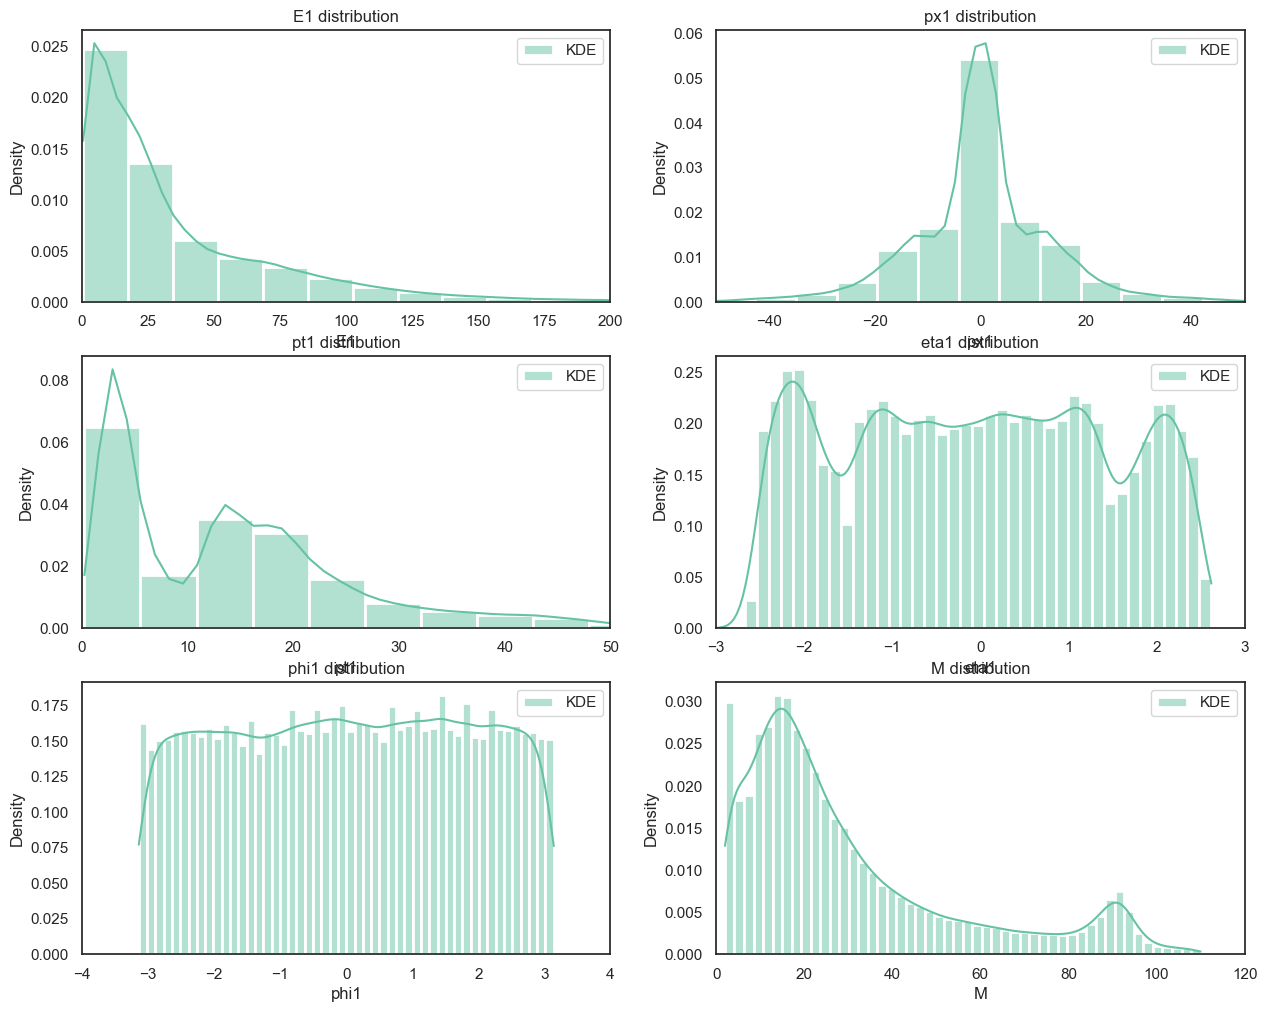

In [123]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, column in enumerate(columns): 
    ax = axs[i // len(axs[0]), i % len(axs[0])]
    sns.histplot(
        df_chosen_columns[column],
        stat='density',
        bins=50,
        kde=True,
        label="KDE",
        linewidth=2,
        ax=ax
    ).set(xlim=ranges_without_outliers[column])
    ax.set_title(f'{column} distribution')
    ax.legend()


# for column, column_range in ranges_without_outliers.items():
#     plt.figure(figsize=(15, 6))
    
#     # для каждого признака оставьте значения внутри ранее заданного промежутка column_range
#     <...>
    
#     sns.distplot(<...>, bins=20);
#     plt.title('Оценка распределения ' + column)

**Сделайте выводы.** Какой из двух видов графиков более нагляден для данных выборки? Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность? 

**Вывод:**

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.



**Приведите примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:

...

**Сделайте выводы по всей задаче:**

...

### Задача 3

В этой задаче нужно визуализировать *центральную предельную теорему*.



*a).* Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. 

In [153]:
sample_size = 300
samples_count = 500

samples = sps.expon.rvs(size=(samples_count, sample_size))

По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [232]:
sums = samples.cumsum(axis=1)

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [233]:
zs = (sums - sums.mean(axis=0)) / sums.std(axis=0)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

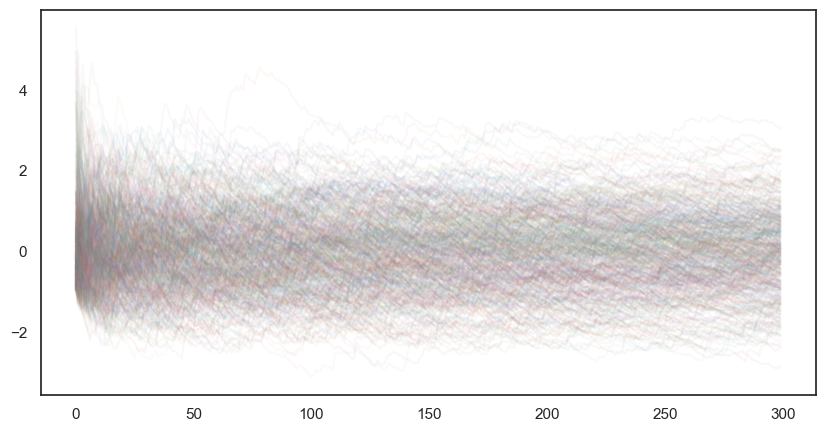

In [241]:
plt.figure(figsize=(10, 5))

for z in zs:
    plt.plot(z, alpha=0.05)


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

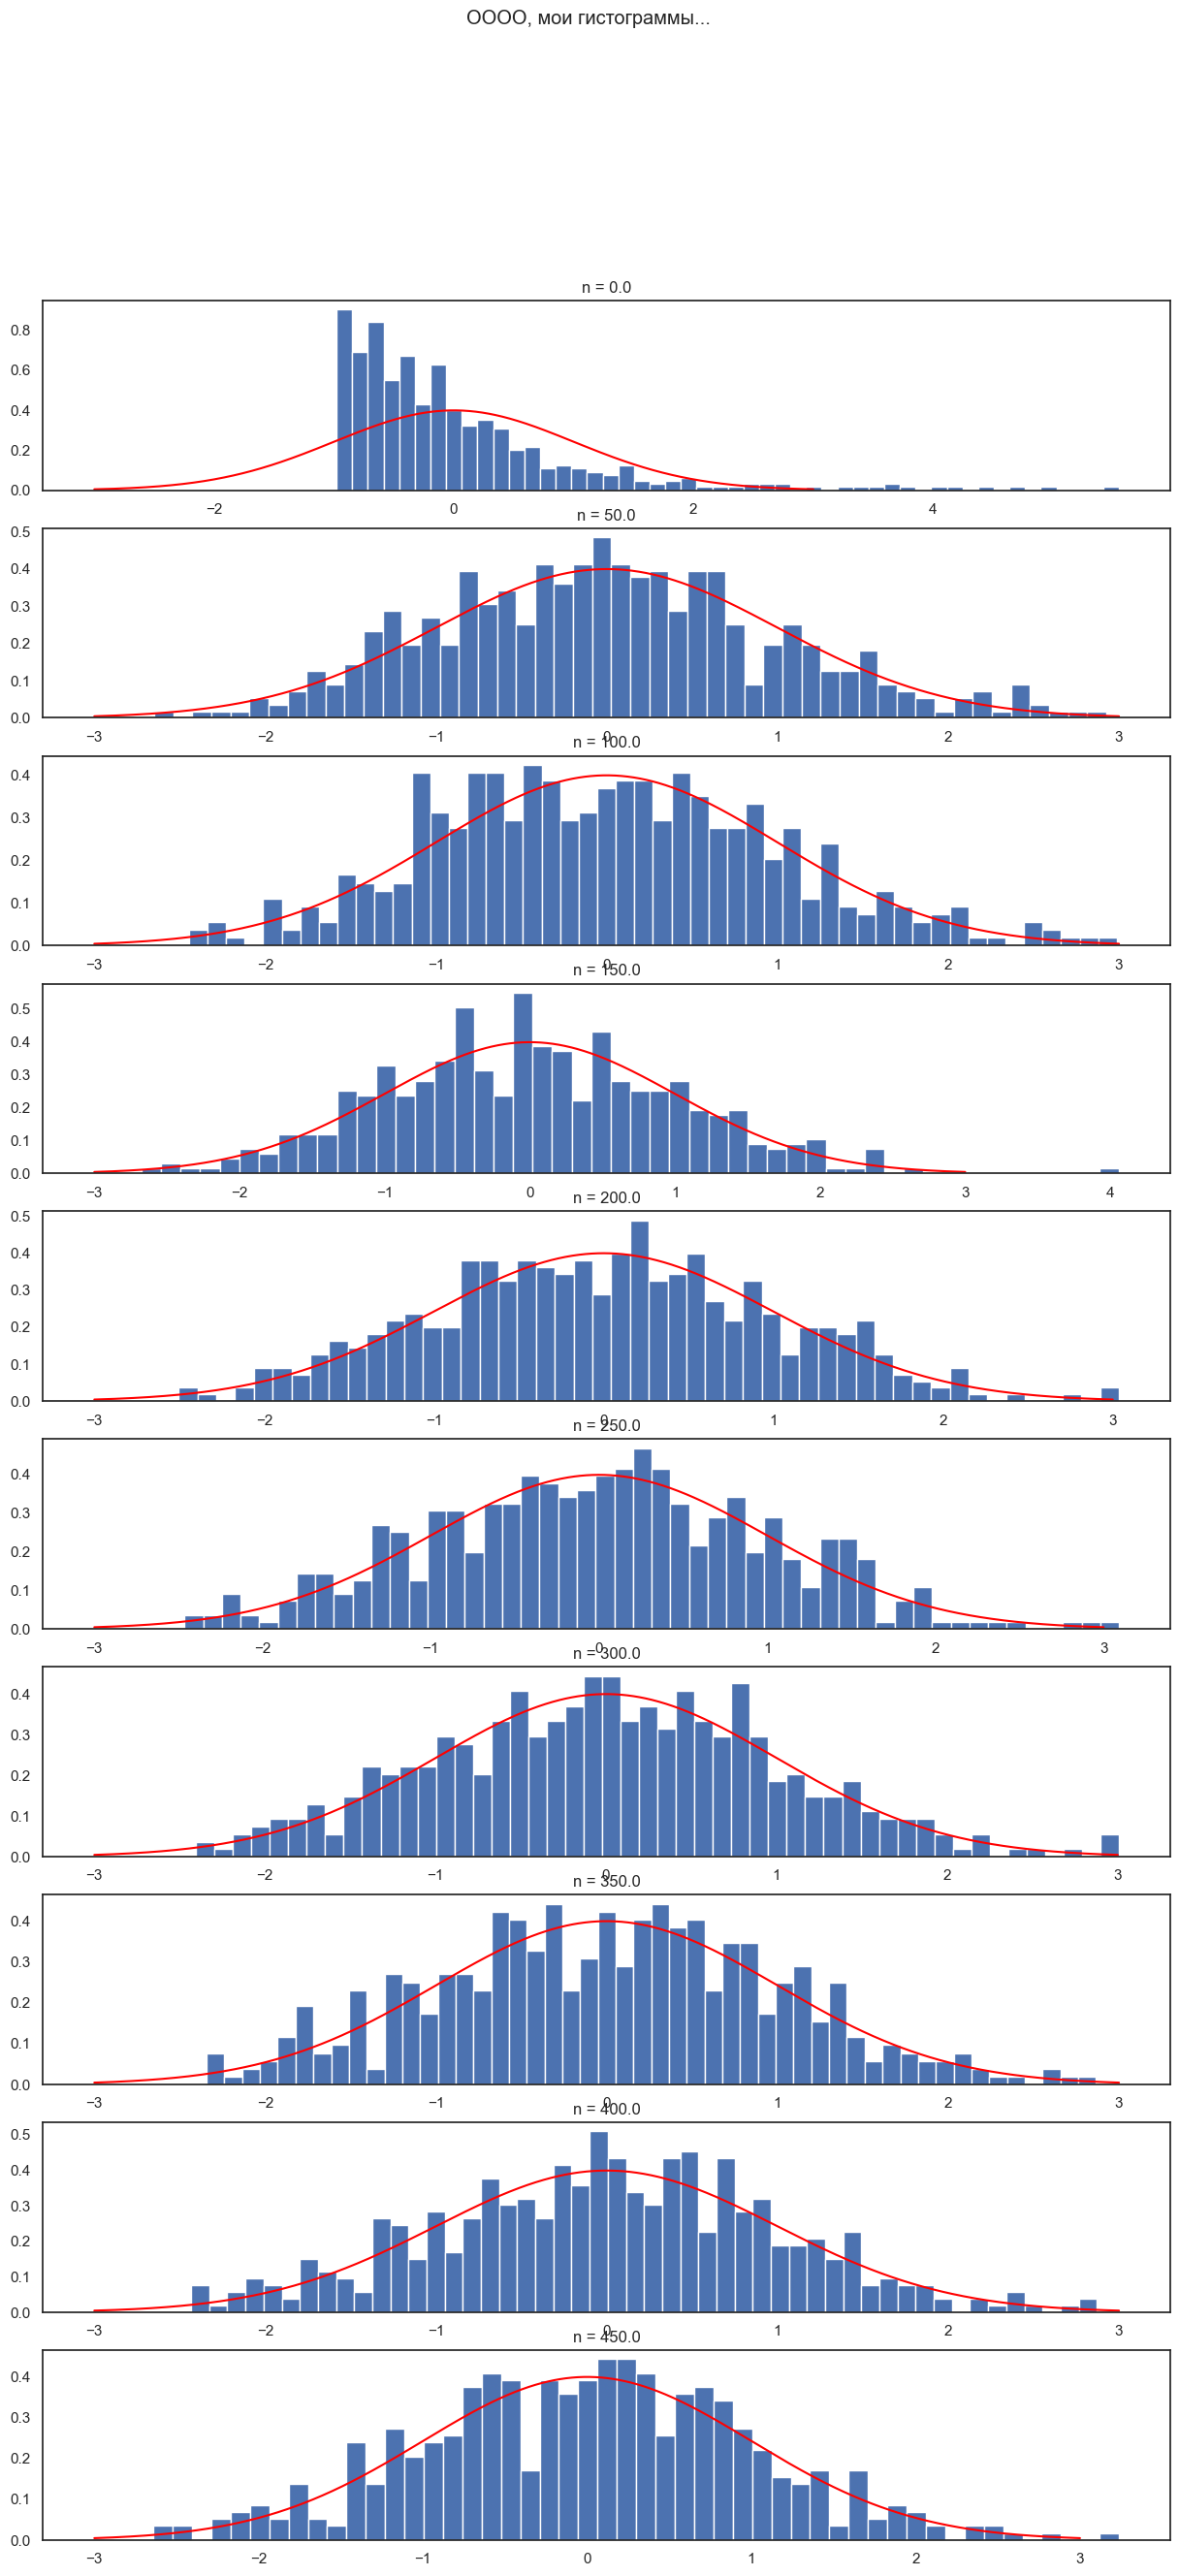

In [243]:
fig, axs = plt.subplots(10, 1, figsize=(15, 30))
grid = np.linspace(-3, 3, 1000)

for i in range(len(axs)):
    axs[i].hist(
        x=zs[:, int(sample_size / len(axs)) * i],
        bins=50,
        density=True,
        label="Гистограмма",
    )
    axs[i].set_title(f"n = {samples_count / len(axs) * i}")
    axs[i].plot(grid, sps.norm.pdf(grid), color="red", label="Плотность N(0, 1)")

fig.suptitle("ОООО, мои гистограммы...")

plt.show()






*b).* Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

In [247]:
sample_size = 300
samples_count = 500

samples = sps.poisson(1).rvs(size=(samples_count, sample_size))

In [248]:
sums = samples.cumsum(axis=1)

In [249]:
zs = (sums - sums.mean(axis=0)) / sums.std(axis=0)

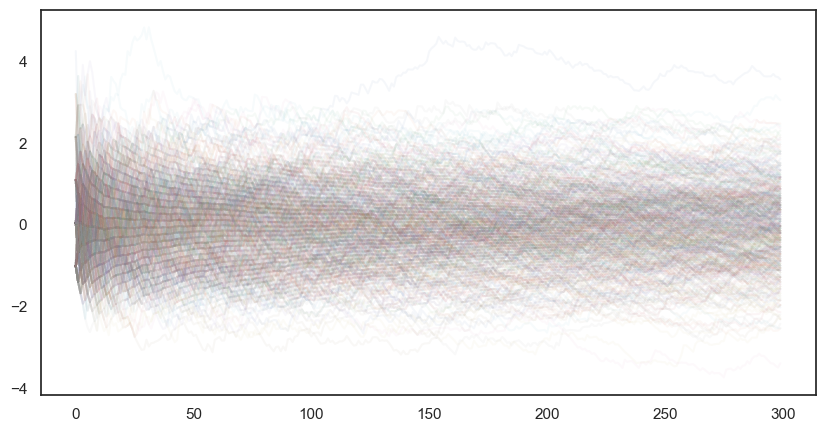

In [250]:
plt.figure(figsize=(10, 5))

for z in zs:
    plt.plot(z, alpha=0.05)

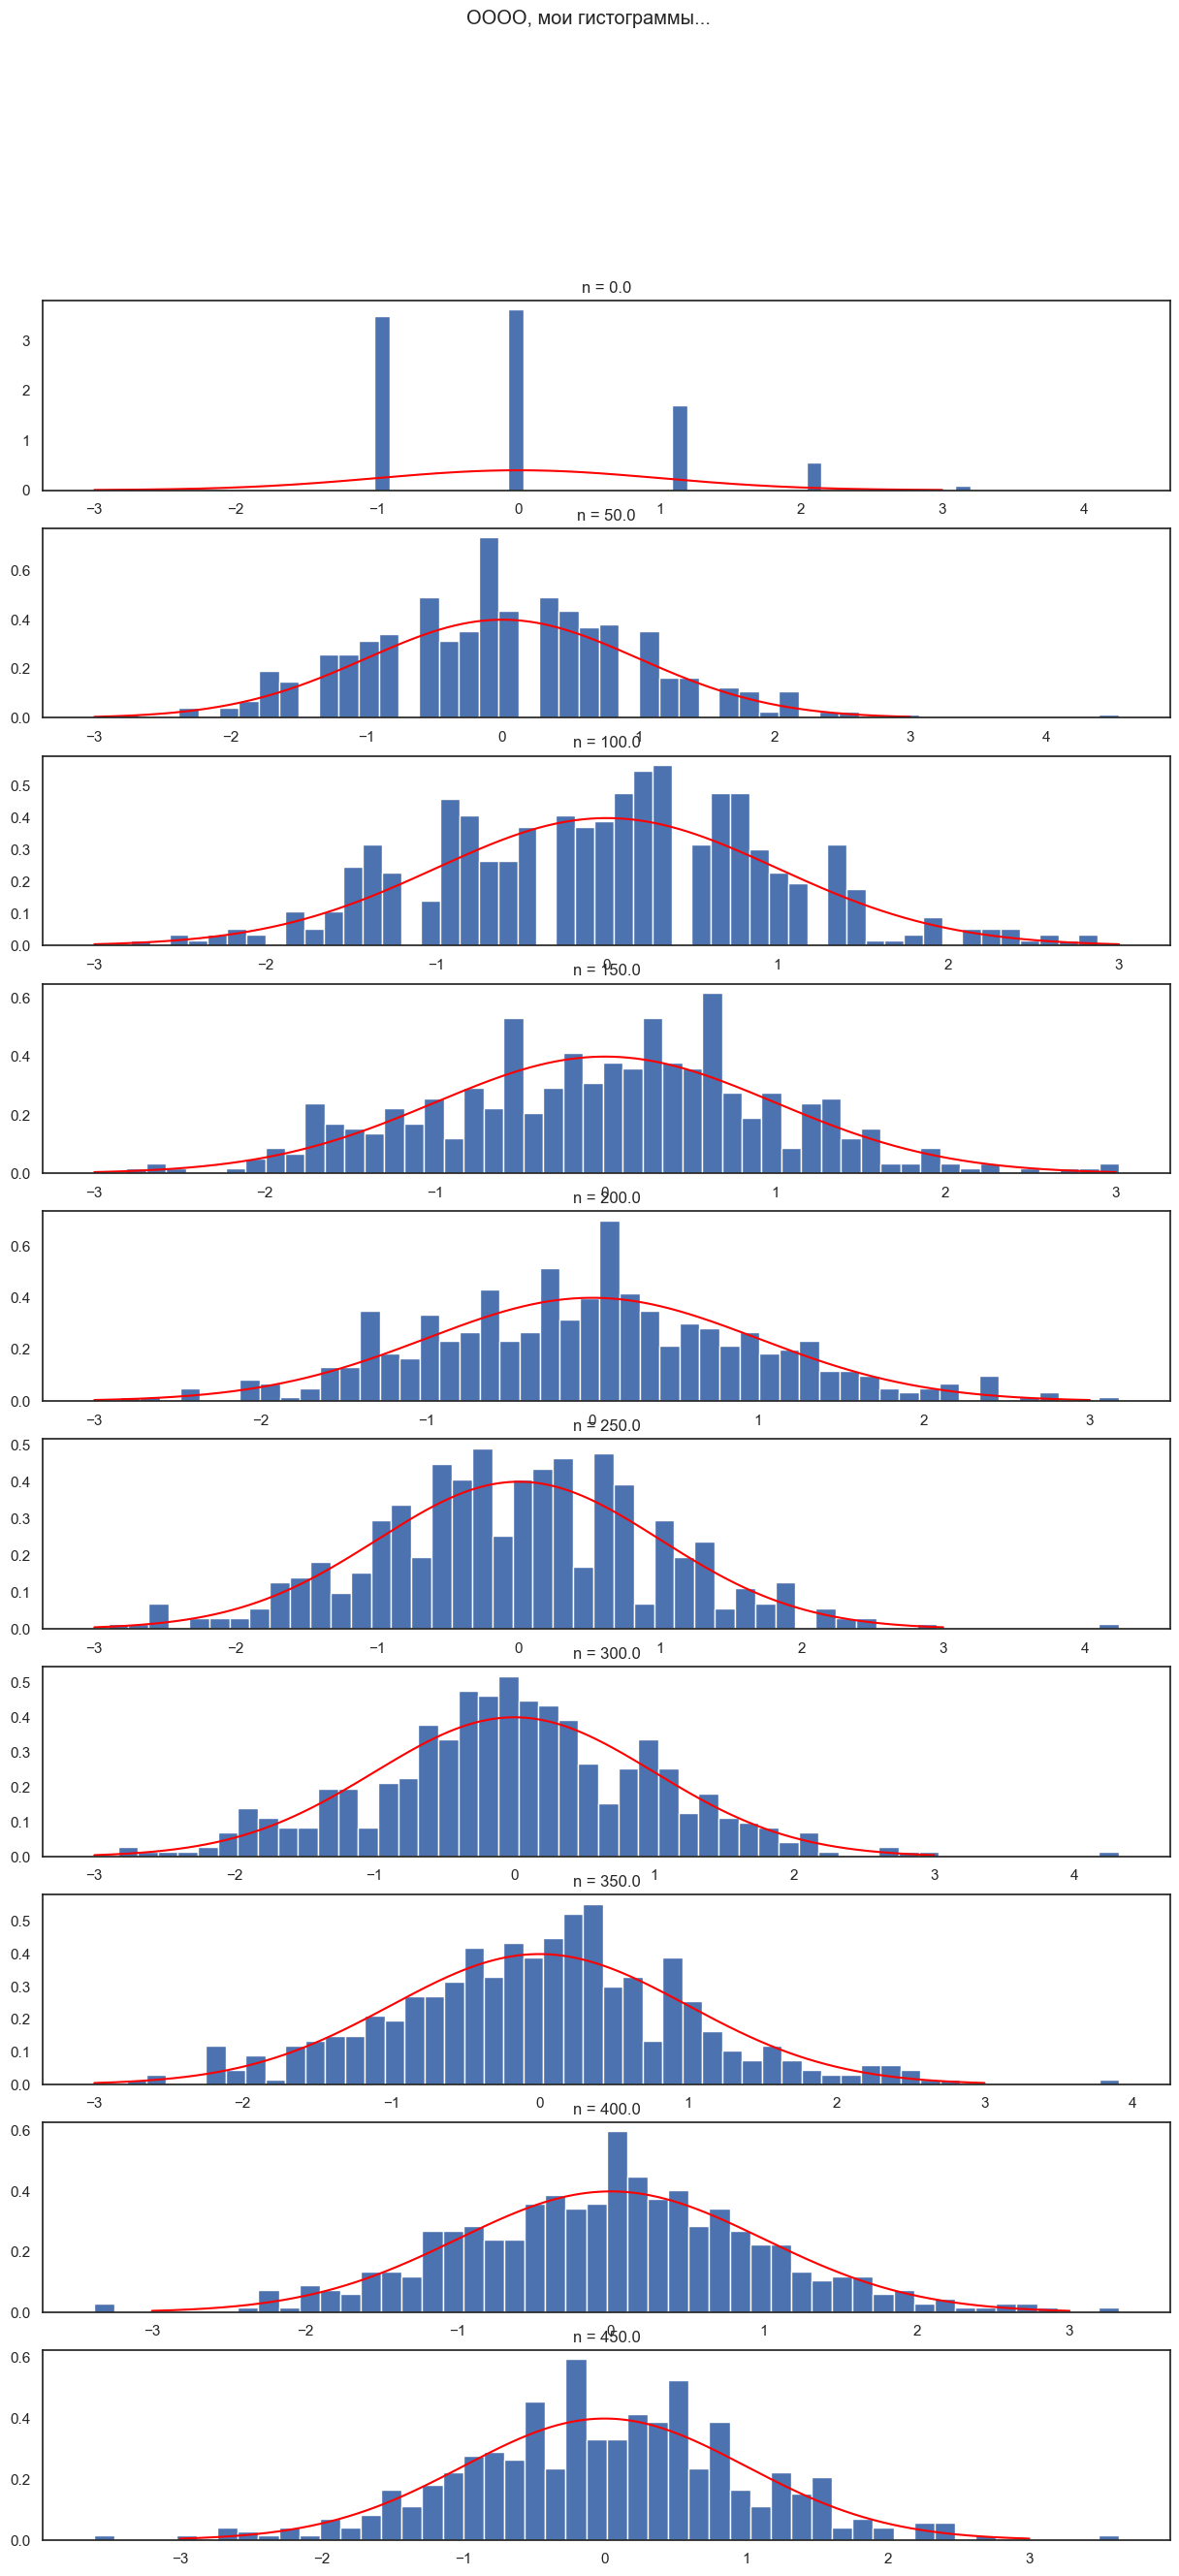

In [251]:
fig, axs = plt.subplots(10, 1, figsize=(15, 30))
grid = np.linspace(-3, 3, 1000)

for i in range(len(axs)):
    axs[i].hist(
        x=zs[:, int(sample_size / len(axs)) * i],
        bins=50,
        density=True,
        label="Гистограмма"
    )
    axs[i].set_title(f"n = {samples_count / len(axs) * i}")
    axs[i].plot(grid, sps.norm.pdf(grid), color="red", label="Плотность N(0, 1)")

fig.suptitle("ОООО, мои гистограммы...")

plt.show()

<b><i><font color="orange">Сложная часть</font></i></b>

### Задача 4:

Ссылка на контест в боте.

### Задача 5:

Ссылка на контест в боте.